<a href="https://colab.research.google.com/github/Hilol16070/AI/blob/main/laba_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ПРАКТИЧЕСКАЯ РАБОТА 6. РАБОТА С ИЗОБРАЖЕНИЯМИ. БИБЛИОТЕКА PILLOW

Давлатов Хилол Илхомджонович
ПИН-б-о-22-1 09.03.03 Прикладная информатика

Цель работы: научиться обрабатывать изображения с использованием
библиотеки Pillow.
Задачи лабораторной работы:
– научиться открывать, сохранять и конвертировать изображения;
– научиться работать каналами изображений;
– научиться фильтровать, трансформировать изображения.



![image.png](attachment:image.png)

In [ ]:
import requests

url = "https://i.pinimg.com/736x/45/19/0c/45190ce3b89c6834d99ce339fcb2dfbb.jpg"
resp = requests.get(url)
print(resp)
with open("cat.jpeg", "wb") as file:
    file.write(resp.content)

<Response [200]>


In [ ]:
from PIL import Image

print(type(Image))

with Image.open("cat.jpeg") as img:
    img.load()

img.show()


<class 'module'>


In [ ]:
print(img.size)

(736, 835)


In [ ]:
import matplotlib.pyplot as plt

crop_img = img.crop((200,10,650,350))
print(crop_img.size)
crop_img.show()

(450, 340)


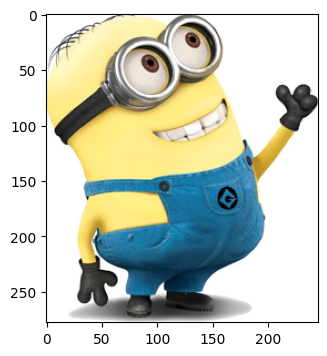

In [ ]:
kh, kw  = img.width // 3, img.height // 3
from matplotlib import pyplot
img_resize = img.resize((kh, kw))
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.imshow(img_resize)

In [ ]:
print(img.getbands())
cmyk_img = img.convert("I")
print(cmyk_img.getbands())
cmyk_img.show()

('R', 'G', 'B')
('I',)


![image-2.png](attachment:image-2.png)

In [ ]:
img.show()

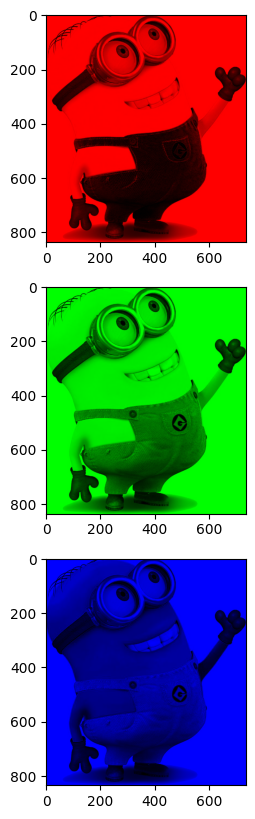

In [ ]:
red, green, blue = img.split()
z = red.point(lambda _: 0)
red_img = Image.merge("RGB", (red, z, z))
green_img = Image.merge("RGB", (z, green, z))
blue_img = Image.merge("RGB", (z, z, blue))

fig, axes = plt.subplots(nrows= 3, ncols= 1, figsize=(10,10))

axes[0].imshow(red_img)
axes[1].imshow(green_img)
axes[2].imshow(blue_img)


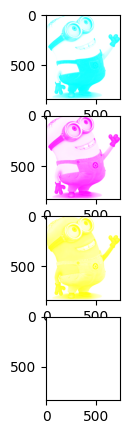

In [ ]:
cmyk_img = img.convert('CMYK')

C,M,Y,K = cmyk_img.split()

zeros = red.point(lambda _: 0)
c_img = Image.merge("CMYK", (C, zeros, zeros, zeros))
m_img = Image.merge("CMYK",(zeros, M, zeros, zeros))
y_img = Image.merge("CMYK", (zeros, zeros, Y, zeros))
k_img = Image.merge("CMYK", (zeros, zeros, zeros, K))

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,5))
axes[0].imshow(c_img)
axes[1].imshow(m_img)
axes[2].imshow(y_img)
axes[3].imshow(k_img)

In [ ]:
from PIL import ImageFilter


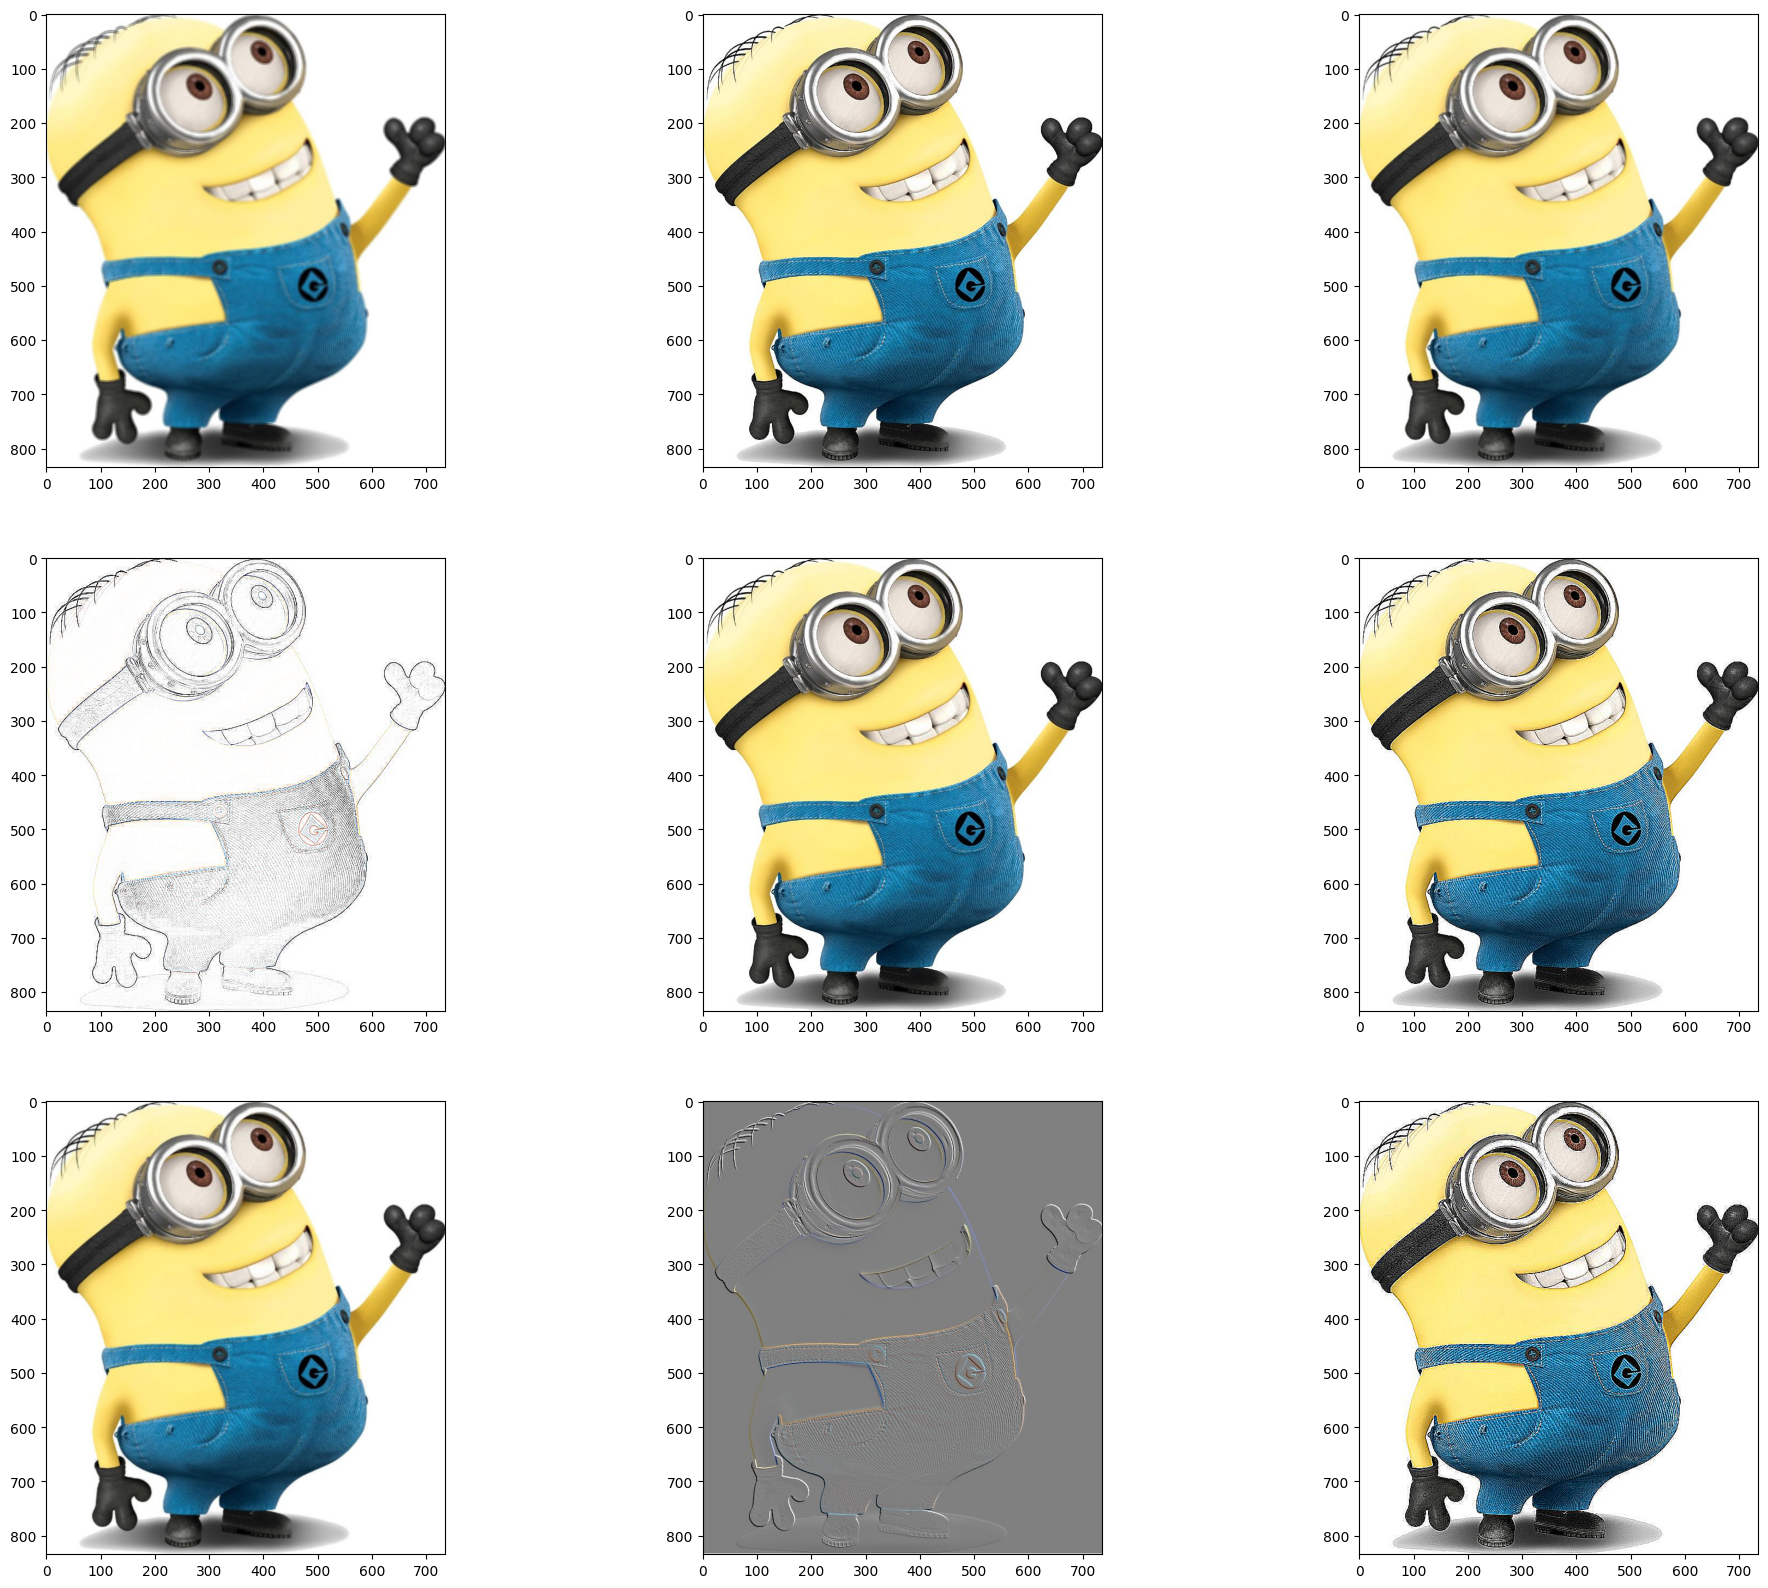

In [ ]:
c = 0
filters = [ImageFilter.BLUR, ImageFilter.SHARPEN, ImageFilter.SMOOTH,ImageFilter.CONTOUR,ImageFilter.DETAIL,ImageFilter.EDGE_ENHANCE,ImageFilter.SMOOTH_MORE,ImageFilter.EMBOSS,ImageFilter.EDGE_ENHANCE_MORE]
fig, axes = plt.subplots(nrows= 3, ncols= 3, figsize= (24,20))
for i in range(3):
    for j in range(3):

        axes[i, j].imshow(img.filter(filters[c]))
        c += 1

In [ ]:
import numpy as np
kernel5x5 = [10,-1,-1,-1,-7,
             -1,5,-1,-7,-1,
             -1,-1,10,-1,-1,
             -1,-7,-1,5,-1,
             -7,-1,-1,-1,10]
scale = None
offset=0.0

filterred_image = img.filter(ImageFilter.Kernel(size=(5,5), kernel=kernel5x5, scale=scale, offset=offset))

filterred_image.show()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

1. crop - обрезка изображения
resize - приведение размера изображения к новым ширине и высоте
reduce - масштабирование пропорционально коэффициенту
thumbnail - изменяет сам объект изображения, не создает копию. Приводит к созданию миниатюры
2. Для конвертации изображения используется функция convert(mode). Возможные значения mode:

1 (1-bit pixels, black and white, stored with one pixel per byte)

L (8-bit pixels, black and white)

P (8-bit pixels, mapped to any other mode using a color palette)

RGB (3x8-bit pixels, true color)

RGBA (4x8-bit pixels, true color with transparency mask)

CMYK (4x8-bit pixels, color separation)

YCbCr (3x8-bit pixels, color video format)

LAB (3x8-bit pixels, the Lab color space)

HSV (3x8-bit pixels, Hue, Saturation, Value color space)

I (32-bit signed integer pixels)

F (32-bit floating point pixels)
3. Фильтрация означает изменение значений пикселей, а именно цветовых  каналов пикселей
4. RGB — это адаптивная цветовая модель получения любых оттенков видимого человеческим глазом спектра, при которой смешиваются красный, зелёный и синий.
5. Растр — это множество мелких точек, из которых может состоять изображение.
Формат изображения — это способ записи графической информации или спецификация структуры данных, записанных в компьютерный файл.
палитра — ограниченный набор цветов, доступный графической системе компьютера
Глубина изображения — это термин компьютерной графики, означающий количество бит (объём памяти), используемое для хранения и представления цвета при кодировании.
Разрешение изображения — это количество пикселей, которые составляют растровое изображение.


